<a href="https://colab.research.google.com/github/NayanSantoshMali/MY-PROJECT/blob/main/Boxoffice_Revenue_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Box Office Revenue Prediction Using Linear Regression in ML**

META DATA

title (string): Movie name.   
domestic_revenue (int): Revenue earned domestically.    
world_revenue (int): Revenue earned worldwide.     
distributor (string): Movie distributor (e.g., Disney, Warner Bros.).    
opening_revenue (int): Revenue from the opening weekend.      
opening_theaters (int): Number of theaters where the movie opened.     
budget (int): Production budget.   
MPAA (string): Movie rating (e.g., G, R, PG-13).     
genres (string): Movie genre (e.g., Action, Animation).    
release_days (int): Number of days since release.   

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [121]:
#connect google drive with colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
df_data = pd.read_csv('/content/drive/MyDrive/Machine learning/boxoffice.csv')
#print headers of the data
df_data.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158


## **Data Cleaning and Preprocessing**

In [ ]:
#Check for missing values
print(df_data.isnull().sum())
data = df_data.dropna()  # Drop rows with missing values

title               0
domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64


In [ ]:
# We will be predicting only domestic_revenue in this Dataset.
to_remove = ['world_revenue']
df_data.drop(to_remove, axis=1, inplace=True)

In [ ]:
# Features (X) and target (y)
X = data[['opening_revenue','budget']]
y = data['domestic_revenue']

In [ ]:
#Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Build the Linear Regression Model**


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **hidden cells**

In [ ]:
# Calculate average domestic revenue for each genre
genre_scores = data.groupby('genres')['domestic_revenue'].mean().to_dict()

# Assign genre score to each movie
data['genre_score'] = data['genres'].map(genre_scores)

In [ ]:
data['opening_revenue_per_theater'] = data['opening_revenue'] / data['opening_theaters']

In [ ]:
data['log_budget'] = np.log1p(data['budget'])
data['log_opening_revenue'] = np.log1p(data['opening_revenue']) # Removed extra indent

In [ ]:
X = data[['log_budget', 'log_opening_revenue', 'opening_revenue_per_theater', 'genre_score']]
y = data['domestic_revenue']

# **Evalute the model**

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Round the values
rounded_mse = round(mse, 2)  # Round MSE to 2 decimal places
rounded_r2 = round(r2, 4)    # Round R2 to 4 decimal places for better precision

print("Mean Squared Error (Rounded):", rounded_mse)
print("R-Squared Value (Rounded):", rounded_r2)


Mean Squared Error (Rounded): 7478001782406860.0
R-Squared Value (Rounded): 0.0016


In [ ]:
# Normalize MSE by the range of the target variable (y)
target_range = y.max() - y.min()
normalized_mse = mse / target_range

# Round the normalized MSE
rounded_normalized_mse = round(normalized_mse, 2)
print("Normalized Mean Squared Error (Rounded):", rounded_normalized_mse)

Normalized Mean Squared Error (Rounded): 25011463.47


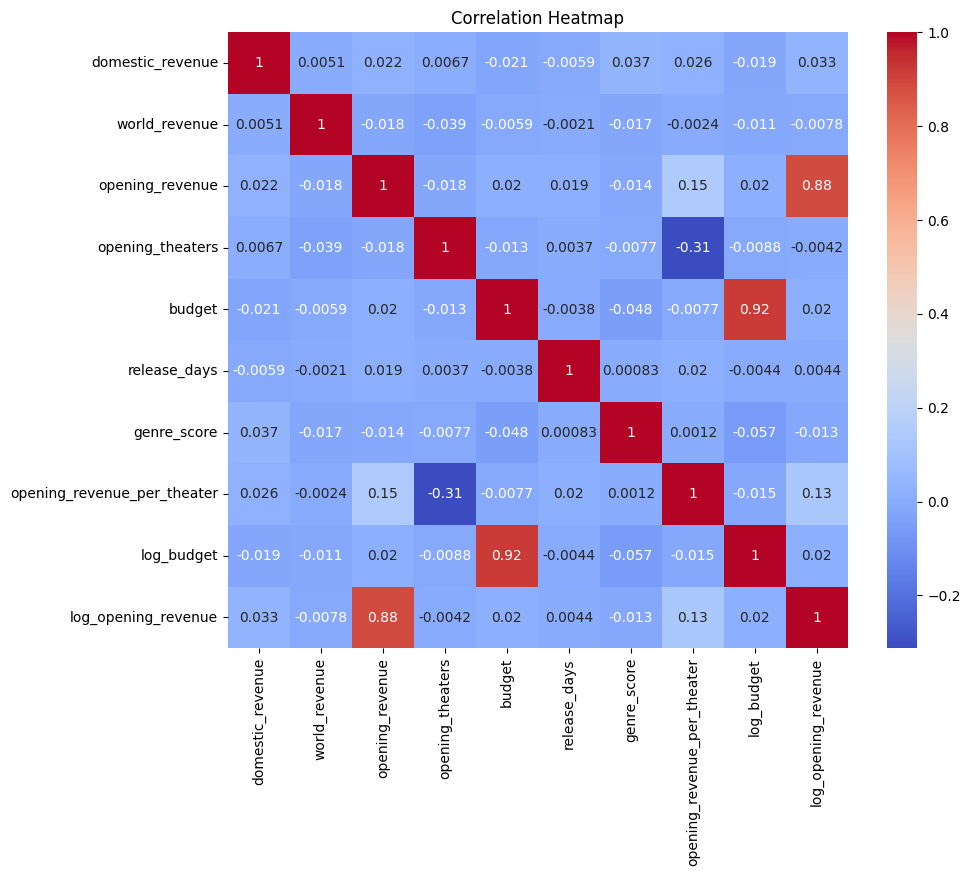

In [ ]:
# Convert relevant columns to numeric types if possible
# If 'budget' or 'domestic_revenue' are strings, convert to numeric:
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['domestic_revenue'] = pd.to_numeric(data['domestic_revenue'], errors='coerce')

# Select only numeric features for correlation analysis
numeric_features = data.select_dtypes(include=np.number).columns
data_numeric = data[numeric_features]

plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Visualize the Results**

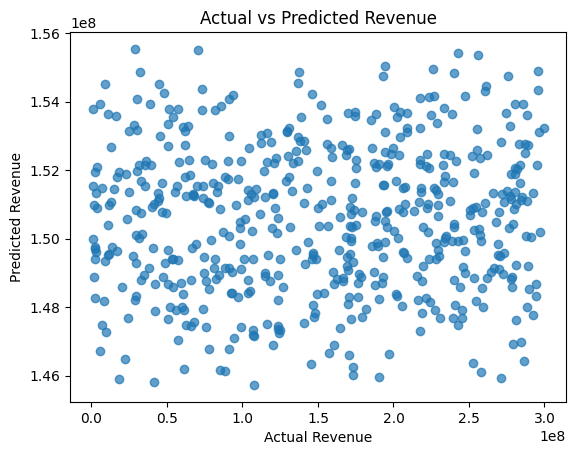

In [ ]:
#Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

## **Plots for Feature Relationships**

In [ ]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(data, x='budget', y='domestic_revenue', color='genres')
fig.show()


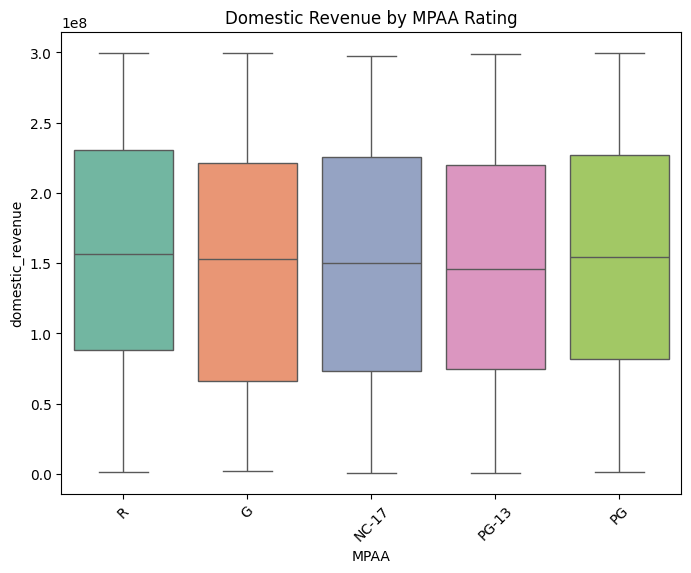

In [ ]:
# Box plot for MPAA ratings and domestic revenue
plt.figure(figsize=(8, 6))
sns.boxplot(x='MPAA', y='domestic_revenue', data=df_data, palette="Set2")
plt.title("Domestic Revenue by MPAA Rating")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Train model only with 'budget'
X = data[['budget']]
y = data['domestic_revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict with new data
input_data = np.array([[15000000]])
predicted_revenue = model.predict(input_data)

# Round the predicted revenue to 2 decimal places
rounded_revenue = round(predicted_revenue[0], 2)
print("Predicted Revenue:", rounded_revenue)


Predicted Revenue: 153668223.27


In [ ]:
# Feature selection
X = data[['opening_revenue']]
y = data['domestic_revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test prediction
input_data = np.array([[1400000]])
predicted_revenue = model.predict(input_data)

# Round the predicted revenue to 2 decimal places
rounded_revenue = round(predicted_revenue[0], 0)
print("Predicted Revenue:", rounded_revenue)

Predicted Revenue: 148716453.0


## **Advanced Prediction Techniques**

In [ ]:
#Stacking Regressors:
#Combine multiple algorithms to improve the predictive power.

from sklearn.ensemble import StackingRegressor, RandomForestRegressor # Import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='linear'))
]

# Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Evaluate Stacking Regressor
stacked_predictions = stacked_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Stacked Model MAE:", mean_absolute_error(y_test, stacked_predictions))


# **Analyze Genre-Specific** **Trends**

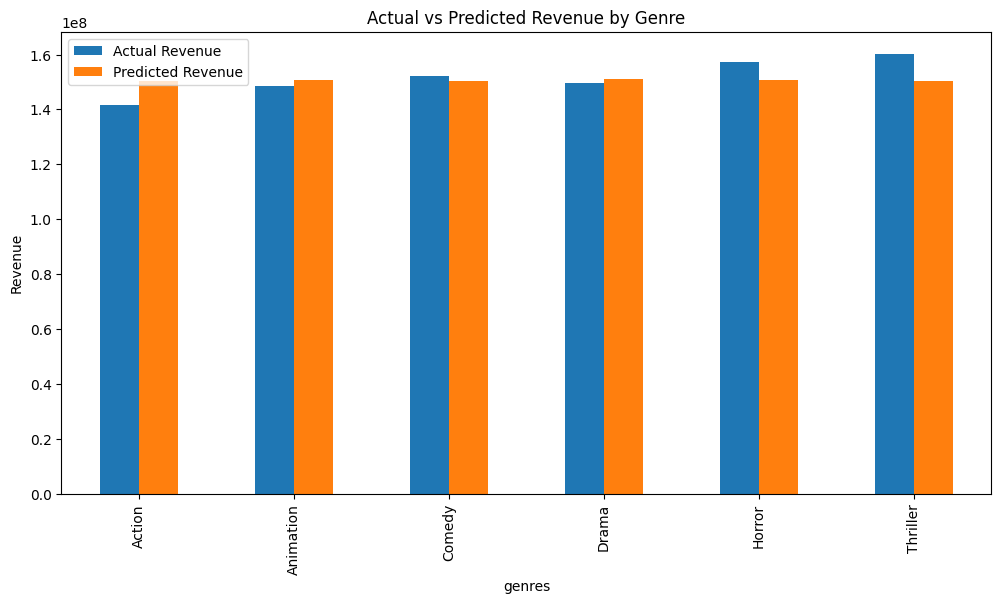

In [ ]:
# Group by genres and calculate average actual vs predicted revenue
genre_analysis = data[['genres', 'opening_theaters']].copy() # Include 'genres' column
genre_analysis = genre_analysis[genre_analysis.index.isin(X_test.index)] # Filter to match X_test indices
genre_analysis['Actual Revenue'] = y_test
genre_analysis['Predicted Revenue'] = y_pred
genre_trends = genre_analysis.groupby('genres')[['Actual Revenue', 'Predicted Revenue']].mean()

# Plot genre trends
genre_trends.plot(kind='bar', figsize=(12, 6))
plt.title('Actual vs Predicted Revenue by Genre')
plt.ylabel('Revenue')
plt.show()

## **Time-Series Analysis**

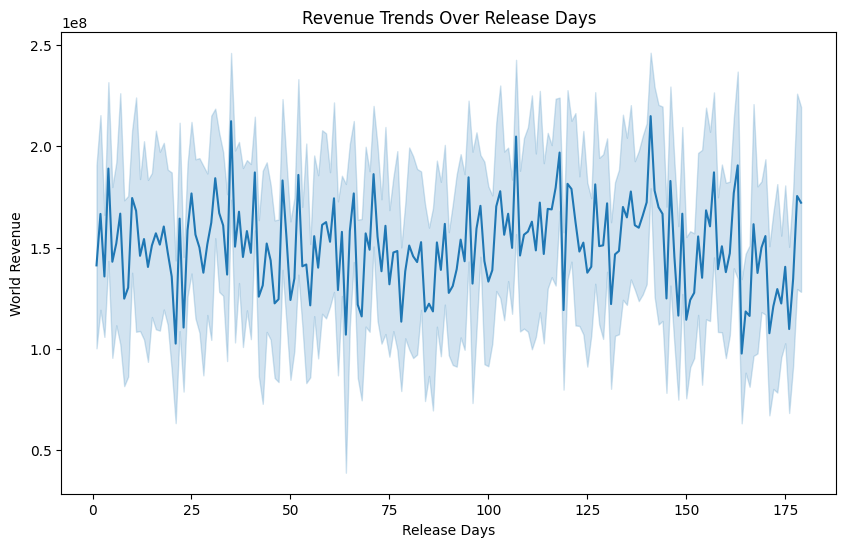

In [ ]:
# Plot revenue trends over release days
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_data['release_days'], y=df_data['domestic_revenue'])
plt.title('Revenue Trends Over Release Days')
plt.xlabel('Release Days')
plt.ylabel('World Revenue')
plt.show()

## **Model Comparison**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler # Import a preprocessor

# List of models
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=5, random_state=42))
]

# Compare models
for name, model in models:
    # Define a preprocessor (e.g., StandardScaler)
    preprocessor = StandardScaler()
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    print(f"{name} MAE: {mean_absolute_error(y_test, preds):.2f}")

Random Forest MAE: 88910326.80
Ridge Regression MAE: 75377250.99
Decision Tree MAE: 76308956.58


## **Sensitivity Analysis**

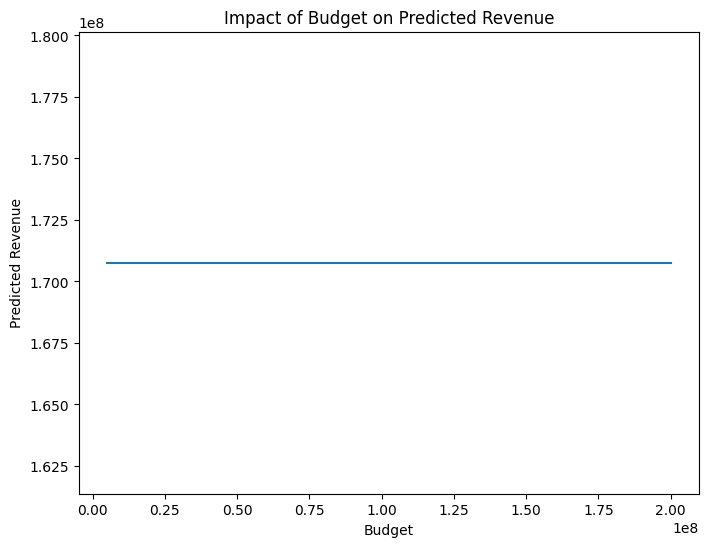

In [ ]:
# Vary budget and observe revenue predictions
budgets = np.linspace(5000000, 200000000, 20)
predictions = []

# Assuming you want to use the last defined 'pipeline' from the previous cell
model_pipeline = pipeline  # Assign the last pipeline to model_pipeline

for budget in budgets:
    input_data = X_test.iloc[0].copy()  # Use a sample row
    # Replace 'opening_theaters' with the new budget value
    input_data['opening_theaters'] = budget
    pred = model_pipeline.predict(pd.DataFrame([input_data]))
    predictions.append(pred[0])

# Plot sensitivity
plt.figure(figsize=(8, 6))
plt.plot(budgets, predictions)
plt.title('Impact of Budget on Predicted Revenue')
plt.xlabel('Budget')
plt.ylabel('Predicted Revenue')
plt.show()